In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
import spacy
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import  train_test_split
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = pd.read_csv("Resume.csv")

In [ ]:
df

,Resumes,Category
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume
...,...,...
74,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resume
75,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday Resume
76,\nVenkateswarlu.B ...,Workday Resume
77,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday Resume


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [ ]:
df.isnull()

,Resumes,Category
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
74,False,False
75,False,False
76,False,False
77,False,False


In [ ]:
df.isnull().sum()

Resumes     0
Category    0
dtype: int64

In [ ]:
df.duplicated().sum()

0


#Checking unnecessary words in the Data

In [ ]:
df.Resumes.str.contains('https://').value_counts()

Resumes
False    72
True      7
Name: count, dtype: int64

In [ ]:
df.Resumes.str.contains('https://').value_counts() / len(df)

Resumes
False    0.911392
True     0.088608
Name: count, dtype: float64

In [ ]:
df.Resumes.str.contains('@').value_counts()

Resumes
False    76
True      3
Name: count, dtype: int64

In [ ]:
df.Resumes.str.contains('@').value_counts() / len(df)

Resumes
False    0.962025
True     0.037975
Name: count, dtype: float64

In [ ]:
print('Total Resumes this period:', len(df.index))

Total Resumes this period: 79


In [ ]:
from nltk import word_tokenize
tokens = df['Resumes'].map(word_tokenize)

In [ ]:
tokens[0:30]

0     [MD, KHIZARUDDIN, RAUF, EXPERIENCE, ⇨, Current...
1     [SUSOVAN, BAG, Seeking, a, challenging, positi...
2     [Naveen, Sadhu, Title, :, software, developer,...
3     [HARIPRIYA, BATTINA, Experience, as, UI, Devel...
4     [SARALA, MADASU, SARALA, MADASU, , 204, ,, Sr...
5     [Kotani, Durga, Prasad, Objective, :, Aspirant...
6     [Thirupathamma, Balla, SUMMARY, :, 2.8, year, ...
7     [PRAGNYA, PATTNAIK, Expertise, :, Having, arou...
8     [[, pic, ], PROFILE, Searching, for, the, oppo...
9     [KAMBALA, SAI, SURENDRA, SUMMARY, PROJECT, , ...
10    [MAREEDU, LOKESH, BABU, PROFESSIONAL, OVERVIEW...
11    [CURRICULUM, VITAE, |Anjani, Priyadarshini, |O...
12    [Maryala, Vinay, Reddy, Professional, Summary,...
13    [Ui-Developer/, React, JS, Developer, NAME, :,...
14    [SHAIK, ABDUL, SHARUK, 2, years, ’, Experience...
15    [KAMALAKAR, REDDY, ., A, Linked, In, :, https,...
16    [Pranish, Sonone, Career, summary, :, Experien...
17    [Name, :, M., Prabakaran, Title, :, UI, De

In [ ]:
data = [Text.strip() for Text in df.Resumes] # removes the given charecters from the beginning and the end of the original string


In [ ]:
data[0:30]

['MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n     \n\n⇨ Currently working in PickupBiz Solution Private Limited, Pune from January 2021 to till date \n\n⇨ 9 Months of working as an Intern on UI React JS - Software Developer \n\n⇨ Having sound experience and exposure on UI development using React JS, Bootstrap, HTML 5, CSS, React Hooks, and Redux etc. \n\n⇨ Ability to work under any given environment \n\n⇨ Demonstrated good communication and Analytical skills \n\n⇨ Team building skills, emphasizing versatility and adaptability \n\n⇨ Dedication and drive as a hard-working individual \n\n⇨ Ability to manage multiple tasks in a pressured environment \n\n                                                                           \n\nApplication Development & UI Designing – \n\n Coordinated with the development team of 10 to discuss user interface ideas and applications. - Reviewed application requirements and interface designs to ensure compatibility with existing applications.  \n\n \n\nUI 

In [ ]:
data = [Text for Text in data if Text] # removes empty strings, because they are considered in python as false


In [ ]:
data

['MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n     \n\n⇨ Currently working in PickupBiz Solution Private Limited, Pune from January 2021 to till date \n\n⇨ 9 Months of working as an Intern on UI React JS - Software Developer \n\n⇨ Having sound experience and exposure on UI development using React JS, Bootstrap, HTML 5, CSS, React Hooks, and Redux etc. \n\n⇨ Ability to work under any given environment \n\n⇨ Demonstrated good communication and Analytical skills \n\n⇨ Team building skills, emphasizing versatility and adaptability \n\n⇨ Dedication and drive as a hard-working individual \n\n⇨ Ability to manage multiple tasks in a pressured environment \n\n                                                                           \n\nApplication Development & UI Designing – \n\n Coordinated with the development team of 10 to discuss user interface ideas and applications. - Reviewed application requirements and interface designs to ensure compatibility with existing applications.  \n\n \n\nUI 

In [ ]:
review_text = ' '.join(data) # takes all items in a iterable and joins them into one string.
review_text[0:3000]

'MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n     \n\n⇨ Currently working in PickupBiz Solution Private Limited, Pune from January 2021 to till date \n\n⇨ 9 Months of working as an Intern on UI React JS - Software Developer \n\n⇨ Having sound experience and exposure on UI development using React JS, Bootstrap, HTML 5, CSS, React Hooks, and Redux etc. \n\n⇨ Ability to work under any given environment \n\n⇨ Demonstrated good communication and Analytical skills \n\n⇨ Team building skills, emphasizing versatility and adaptability \n\n⇨ Dedication and drive as a hard-working individual \n\n⇨ Ability to manage multiple tasks in a pressured environment \n\n                                                                           \n\nApplication Development & UI Designing – \n\n Coordinated with the development team of 10 to discuss user interface ideas and applications. - Reviewed application requirements and interface designs to ensure compatibility with existing applications.  \n\n \n\nUI C

In [ ]:
from nltk.tokenize import TweetTokenizer
ttr = TweetTokenizer(strip_handles= True)

In [ ]:
review_tokens = ttr.tokenize(review_text)

In [ ]:
print(review_tokens[0:1000])

['MD', 'KHIZARUDDIN', 'RAUF', 'EXPERIENCE', '⇨', 'Currently', 'working', 'in', 'PickupBiz', 'Solution', 'Private', 'Limited', ',', 'Pune', 'from', 'January', '2021', 'to', 'till', 'date', '⇨', '9', 'Months', 'of', 'working', 'as', 'an', 'Intern', 'on', 'UI', 'React', 'JS', '-', 'Software', 'Developer', '⇨', 'Having', 'sound', 'experience', 'and', 'exposure', 'on', 'UI', 'development', 'using', 'React', 'JS', ',', 'Bootstrap', ',', 'HTML', '5', ',', 'CSS', ',', 'React', 'Hooks', ',', 'and', 'Redux', 'etc', '.', '⇨', 'Ability', 'to', 'work', 'under', 'any', 'given', 'environment', '⇨', 'Demonstrated', 'good', 'communication', 'and', 'Analytical', 'skills', '⇨', 'Team', 'building', 'skills', ',', 'emphasizing', 'versatility', 'and', 'adaptability', '⇨', 'Dedication', 'and', 'drive', 'as', 'a', 'hard-working', 'individual', '⇨', 'Ability', 'to', 'manage', 'multiple', 'tasks', 'in', 'a', 'pressured', 'environment', 'Application', 'Development', '&', 'UI', 'Designing', '–', 'Coordinated', 'w

In [ ]:
review_tokens_text = ' '.join(review_tokens)

In [ ]:
review_tokens_text[0:1000]

'MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently working in PickupBiz Solution Private Limited , Pune from January 2021 to till date ⇨ 9 Months of working as an Intern on UI React JS - Software Developer ⇨ Having sound experience and exposure on UI development using React JS , Bootstrap , HTML 5 , CSS , React Hooks , and Redux etc . ⇨ Ability to work under any given environment ⇨ Demonstrated good communication and Analytical skills ⇨ Team building skills , emphasizing versatility and adaptability ⇨ Dedication and drive as a hard-working individual ⇨ Ability to manage multiple tasks in a pressured environment Application Development & UI Designing – Coordinated with the development team of 10 to discuss user interface ideas and applications . - Reviewed application requirements and interface designs to ensure compatibility with existing applications . UI Components Designing & Application Interface Coding – Identified web-based user interactions and developed highly responsive user interfac

#Remove Punchuation From Text

In [ ]:
import string

In [ ]:
# Removeing all the punchuation from the review_tokens_text
no_punc_text= review_tokens_text.translate(str.maketrans('','',string.punctuation))

In [ ]:
no_punc_text[:1000]

'MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently working in PickupBiz Solution Private Limited  Pune from January 2021 to till date ⇨ 9 Months of working as an Intern on UI React JS  Software Developer ⇨ Having sound experience and exposure on UI development using React JS  Bootstrap  HTML 5  CSS  React Hooks  and Redux etc  ⇨ Ability to work under any given environment ⇨ Demonstrated good communication and Analytical skills ⇨ Team building skills  emphasizing versatility and adaptability ⇨ Dedication and drive as a hardworking individual ⇨ Ability to manage multiple tasks in a pressured environment Application Development  UI Designing – Coordinated with the development team of 10 to discuss user interface ideas and applications   Reviewed application requirements and interface designs to ensure compatibility with existing applications  UI Components Designing  Application Interface Coding – Identified webbased user interactions and developed highly responsive user interface components via

#Remove URL'S from text

In [ ]:
no_url_text = re.sub(r'http\s+','',no_punc_text)

In [ ]:
no_url_text[:1000]

'MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently working in PickupBiz Solution Private Limited  Pune from January 2021 to till date ⇨ 9 Months of working as an Intern on UI React JS  Software Developer ⇨ Having sound experience and exposure on UI development using React JS  Bootstrap  HTML 5  CSS  React Hooks  and Redux etc  ⇨ Ability to work under any given environment ⇨ Demonstrated good communication and Analytical skills ⇨ Team building skills  emphasizing versatility and adaptability ⇨ Dedication and drive as a hardworking individual ⇨ Ability to manage multiple tasks in a pressured environment Application Development  UI Designing – Coordinated with the development team of 10 to discuss user interface ideas and applications   Reviewed application requirements and interface designs to ensure compatibility with existing applications  UI Components Designing  Application Interface Coding – Identified webbased user interactions and developed highly responsive user interface components via

#Tokenization

In [ ]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_url_text)

In [ ]:
print(text_tokens[:150])

['MD', 'KHIZARUDDIN', 'RAUF', 'EXPERIENCE', '⇨', 'Currently', 'working', 'in', 'PickupBiz', 'Solution', 'Private', 'Limited', 'Pune', 'from', 'January', '2021', 'to', 'till', 'date', '⇨', '9', 'Months', 'of', 'working', 'as', 'an', 'Intern', 'on', 'UI', 'React', 'JS', 'Software', 'Developer', '⇨', 'Having', 'sound', 'experience', 'and', 'exposure', 'on', 'UI', 'development', 'using', 'React', 'JS', 'Bootstrap', 'HTML', '5', 'CSS', 'React', 'Hooks', 'and', 'Redux', 'etc', '⇨', 'Ability', 'to', 'work', 'under', 'any', 'given', 'environment', '⇨', 'Demonstrated', 'good', 'communication', 'and', 'Analytical', 'skills', '⇨', 'Team', 'building', 'skills', 'emphasizing', 'versatility', 'and', 'adaptability', '⇨', 'Dedication', 'and', 'drive', 'as', 'a', 'hardworking', 'individual', '⇨', 'Ability', 'to', 'manage', 'multiple', 'tasks', 'in', 'a', 'pressured', 'environment', 'Application', 'Development', 'UI', 'Designing', '–', 'Coordinated', 'with', 'the', 'development', 'team', 'of', '10', 'to

In [ ]:
len(text_tokens)

58378

#Stopwords Removing

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
no_stop_tokens = [word for word in text_tokens if not word in stop_words]
print(no_stop_tokens[:100])

['MD', 'KHIZARUDDIN', 'RAUF', 'EXPERIENCE', '⇨', 'Currently', 'working', 'PickupBiz', 'Solution', 'Private', 'Limited', 'Pune', 'January', '2021', 'till', 'date', '⇨', '9', 'Months', 'working', 'Intern', 'UI', 'React', 'JS', 'Software', 'Developer', '⇨', 'Having', 'sound', 'experience', 'exposure', 'UI', 'development', 'using', 'React', 'JS', 'Bootstrap', 'HTML', '5', 'CSS', 'React', 'Hooks', 'Redux', 'etc', '⇨', 'Ability', 'work', 'given', 'environment', '⇨', 'Demonstrated', 'good', 'communication', 'Analytical', 'skills', '⇨', 'Team', 'building', 'skills', 'emphasizing', 'versatility', 'adaptability', '⇨', 'Dedication', 'drive', 'hardworking', 'individual', '⇨', 'Ability', 'manage', 'multiple', 'tasks', 'pressured', 'environment', 'Application', 'Development', 'UI', 'Designing', '–', 'Coordinated', 'development', 'team', '10', 'discuss', 'user', 'interface', 'ideas', 'applications', 'Reviewed', 'application', 'requirements', 'interface', 'designs', 'ensure', 'compatibility', 'existin


#Normalization

In [ ]:
lower_words = [Text.lower() for Text in no_stop_tokens]

In [ ]:
print(lower_words[:100])

['md', 'khizaruddin', 'rauf', 'experience', '⇨', 'currently', 'working', 'pickupbiz', 'solution', 'private', 'limited', 'pune', 'january', '2021', 'till', 'date', '⇨', '9', 'months', 'working', 'intern', 'ui', 'react', 'js', 'software', 'developer', '⇨', 'having', 'sound', 'experience', 'exposure', 'ui', 'development', 'using', 'react', 'js', 'bootstrap', 'html', '5', 'css', 'react', 'hooks', 'redux', 'etc', '⇨', 'ability', 'work', 'given', 'environment', '⇨', 'demonstrated', 'good', 'communication', 'analytical', 'skills', '⇨', 'team', 'building', 'skills', 'emphasizing', 'versatility', 'adaptability', '⇨', 'dedication', 'drive', 'hardworking', 'individual', '⇨', 'ability', 'manage', 'multiple', 'tasks', 'pressured', 'environment', 'application', 'development', 'ui', 'designing', '–', 'coordinated', 'development', 'team', '10', 'discuss', 'user', 'interface', 'ideas', 'applications', 'reviewed', 'application', 'requirements', 'interface', 'designs', 'ensure', 'compatibility', 'existin

#Applying Stemming

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]

In [ ]:
print(stemmed_tokens[:100])

['md', 'khizaruddin', 'rauf', 'experi', '⇨', 'current', 'work', 'pickupbiz', 'solut', 'privat', 'limit', 'pune', 'januari', '2021', 'till', 'date', '⇨', '9', 'month', 'work', 'intern', 'ui', 'react', 'js', 'softwar', 'develop', '⇨', 'have', 'sound', 'experi', 'exposur', 'ui', 'develop', 'use', 'react', 'js', 'bootstrap', 'html', '5', 'css', 'react', 'hook', 'redux', 'etc', '⇨', 'abil', 'work', 'given', 'environ', '⇨', 'demonstr', 'good', 'commun', 'analyt', 'skill', '⇨', 'team', 'build', 'skill', 'emphas', 'versatil', 'adapt', '⇨', 'dedic', 'drive', 'hardwork', 'individu', '⇨', 'abil', 'manag', 'multipl', 'task', 'pressur', 'environ', 'applic', 'develop', 'ui', 'design', '–', 'coordin', 'develop', 'team', '10', 'discuss', 'user', 'interfac', 'idea', 'applic', 'review', 'applic', 'requir', 'interfac', 'design', 'ensur', 'compat', 'exist', 'applic', 'ui', 'compon', 'design']


In [ ]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))

In [ ]:
print(doc[:100])

md khizaruddin rauf experience ⇨ currently working pickupbiz solution private limited pune january 2021 till date ⇨ 9 months working intern ui react js software developer ⇨ having sound experience exposure ui development using react js bootstrap html 5 css react hooks redux etc ⇨ ability work given environment ⇨ demonstrated good communication analytical skills ⇨ team building skills emphasizing versatility adaptability ⇨ dedication drive hardworking individual ⇨ ability manage multiple tasks pressured environment application development ui designing – coordinated development team 10 discuss user interface ideas applications reviewed application requirements interface designs ensure compatibility existing applications ui components designing



#Applying Lemmatization

In [ ]:
lemmas = [token.lemma_ for token in doc]

In [ ]:
lemmas

['md',
 'khizaruddin',
 'rauf',
 'experience',
 '⇨',
 'currently',
 'work',
 'pickupbiz',
 'solution',
 'private',
 'limited',
 'pune',
 'january',
 '2021',
 'till',
 'date',
 '⇨',
 '9',
 'month',
 'work',
 'intern',
 'ui',
 'react',
 'js',
 'software',
 'developer',
 '⇨',
 'have',
 'sound',
 'experience',
 'exposure',
 'ui',
 'development',
 'use',
 'react',
 'js',
 'bootstrap',
 'html',
 '5',
 'css',
 'react',
 'hook',
 'redux',
 'etc',
 '⇨',
 'ability',
 'work',
 'give',
 'environment',
 '⇨',
 'demonstrate',
 'good',
 'communication',
 'analytical',
 'skill',
 '⇨',
 'team',
 'building',
 'skill',
 'emphasize',
 'versatility',
 'adaptability',
 '⇨',
 'dedication',
 'drive',
 'hardworke',
 'individual',
 '⇨',
 'ability',
 'manage',
 'multiple',
 'task',
 'pressure',
 'environment',
 'application',
 'development',
 'ui',
 'designing',
 '–',
 'coordinate',
 'development',
 'team',
 '10',
 'discuss',
 'user',
 'interface',
 'idea',
 'application',
 'review',
 'application',
 'requirement

In [ ]:
clean_review = ' '.join(lemmas)
print(clean_review[:1000])

md khizaruddin rauf experience ⇨ currently work pickupbiz solution private limited pune january 2021 till date ⇨ 9 month work intern ui react js software developer ⇨ have sound experience exposure ui development use react js bootstrap html 5 css react hook redux etc ⇨ ability work give environment ⇨ demonstrate good communication analytical skill ⇨ team building skill emphasize versatility adaptability ⇨ dedication drive hardworke individual ⇨ ability manage multiple task pressure environment application development ui designing – coordinate development team 10 discuss user interface idea application review application requirement interface design ensure compatibility exist application ui component design application interface code – identify webbase user interaction develop highly responsive user interface component via react concept translate design wireframe highquality code write application interface via javascript follow reactjs workflows code debug frontend architecture – troubl


#Text Processing On DataFrame

In [ ]:
df = pd.read_csv('Resume.csv')

In [ ]:
df

,Resumes,Category
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume
...,...,...
74,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resume
75,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday Resume
76,\nVenkateswarlu.B ...,Workday Resume
77,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday Resume


In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text


#Converting into Clean Resumes

In [ ]:
df['Clean_Resumes'] = np.vectorize(remove_pattern)(df['Resumes'], '@[\w]*')

In [ ]:
df.head(10)

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG \n\nSeeking a challenging po...
2,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA \n\nExperience as UI Develop...
4,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge..."
5,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...
6,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...
8,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React JS Developer Resume,\n [pic]\n\nPROFILE\n\n Searching for the oppo...
9,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...


#Remove Url from Clean_Resumes

In [ ]:
clean_Resumes =[]

for index, row in df.iterrows():
    words_without_links = [word for word in row.Clean_Resumes.split() if 'http' not in word]
    clean_Resumes.append(' '.join(words_without_links))

df['Clean_Resumes'] = clean_Resumes
df.head(10)

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
4,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
5,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,Kotani Durga Prasad Objective: Aspirant for a ...
6,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
8,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React JS Developer Resume,[pic] PROFILE Searching for the opportunity to...
9,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,KAMBALA SAI SURENDRA SUMMARY PROJECT    Hav...


In [ ]:
df = df[df['Clean_Resumes']!= '']

In [ ]:
df.head()

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
4,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU SARALA MADASU  204,Sri geethika..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Resumes        79 non-null     object
 1   Category       79 non-null     object
 2   Clean_Resumes  79 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [ ]:
df.drop_duplicates(subset=['Clean_Resumes'],keep = False) # dropping the duplicate rows

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
4,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
...,...,...,...
74,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resume,Srikanth (WORKDAY hCM Consultant) Seeking suit...
75,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday Resume,Name : Gopi Krishna Reddy PROFESSIONAL SUMMERY...
76,\nVenkateswarlu.B ...,Workday Resume,Venkateswarlu.B Workday Consultant • Having 5....
77,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday Resume,Chinna Subbarayudu M DOB: 06th March 1994 Nati...


In [ ]:
df.shape

(79, 3)

In [ ]:
df= df.reset_index(drop=True) # resetting the index
df.head()

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
4,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU SARALA MADASU  204,Sri geethika..."


In [ ]:
df.tail()

,Resumes,Category,Clean_Resumes
74,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resume,Srikanth (WORKDAY hCM Consultant) Seeking suit...
75,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday Resume,Name : Gopi Krishna Reddy PROFESSIONAL SUMMERY...
76,\nVenkateswarlu.B ...,Workday Resume,Venkateswarlu.B Workday Consultant • Having 5....
77,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday Resume,Chinna Subbarayudu M DOB: 06th March 1994 Nati...
78,G Himaja\n\n ...,Workday Resume,G Himaja Career Objective To work towards achi...


In [ ]:
df.shape

(79, 3)

#Making text lowercase, removing text in square brackets, links, punctuation and remove words containing numbers

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('!','', text)
    text = re.sub('\[.*?\]','', text)
    text = re.sub('⇨','',text)
    text = re.sub('','',text)
    text = re.sub(':','', text)
    text = re.sub('•', '', text)
    text = re.sub('https?://\S+|www.\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df.Clean_Resumes = df.Clean_Resumes.apply(lambda x: clean_text(x))
df.head()

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
2,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...
4,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,sarala madasu sarala madasu geethika prestig...



#Removing emojis from Clean Resumes

In [ ]:

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
df.Clean_Resumes = df.Clean_Resumes.apply(lambda x: remove_emoji(x))
df.head(10)

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
2,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...
4,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,sarala madasu sarala madasu geethika prestig...
5,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,kotani durga prasad objective aspirant for a p...
6,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,thirupathamma balla summary year of it experi...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...
8,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React JS Developer Resume,profile searching for the opportunity to brin...
9,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,kambala sai surendra summary project having...



#Removing stop words from Clean_Resumes

In [ ]:
my_stop_words = stopwords.words('english')

cleaned_resumes = []

for index, row in df.iterrows():
    words_without_stopwords = [word for word in row.Clean_Resumes.split() if word not in my_stop_words]
    cleaned_resumes.append(' '.join(words_without_stopwords))

df['Absolute_Clean_Resumes'] = cleaned_resumes
df.head(10)

,Resumes,Category,Clean_Resumes,Absolute_Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,md khizaruddin rauf experience currently worki...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...
2,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,naveen sadhu title software developer location...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...
4,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,sarala madasu sarala madasu geethika prestig...,sarala madasu sarala madasu geethika prestiger...
5,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant positio...
6,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,thirupathamma balla summary year of it experi...,thirupathamma balla summary year experience re...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...,pragnya pattnaik expertise around years experi...
8,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React JS Developer Resume,profile searching for the opportunity to brin...,profile searching opportunity bring years expe...
9,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,kambala sai surendra summary project having...,kambala sai surendra summary project basic kno...


In [ ]:
df.shape

(79, 4)

In [ ]:
Tokenized_Resume = df['Absolute_Clean_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)

0    [md, khizaruddin, rauf, experience, currently,...
1    [susovan, bag, seeking, challenging, position,...
2    [naveen, sadhu, title, software, developer, lo...
3    [haripriya, battina, experience, ui, developer...
4    [sarala, madasu, sarala, madasu, geethika, pre...
5    [kotani, durga, prasad, objective, aspirant, p...
6    [thirupathamma, balla, summary, year, experien...
7    [pragnya, pattnaik, expertise, around, years, ...
8    [profile, searching, opportunity, bring, years...
9    [kambala, sai, surendra, summary, project, bas...
Name: Absolute_Clean_Resumes, dtype: object


#Applying Lemmatization on Abosulte_Clean_Resumes

In [ ]:
word_lemmatizer = WordNetLemmatizer()

Tokenized_Resume = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resume.head(10)

0    [md, khizaruddin, rauf, experience, currently,...
1    [susovan, bag, seeking, challenging, position,...
2    [naveen, sadhu, title, software, developer, lo...
3    [haripriya, battina, experience, ui, developer...
4    [sarala, madasu, sarala, madasu, geethika, pre...
5    [kotani, durga, prasad, objective, aspirant, p...
6    [thirupathamma, balla, summary, year, experien...
7    [pragnya, pattnaik, expertise, around, year, e...
8    [profile, searching, opportunity, bring, year,...
9    [kambala, sai, surendra, summary, project, bas...
Name: Absolute_Clean_Resumes, dtype: object

In [ ]:
for i, tokens in enumerate(Tokenized_Resume):
    Tokenized_Resume[i] = ' '.join(tokens)

df['Absolute_Clean_Resumes'] = Tokenized_Resume
df.head(10)

,Resumes,Category,Clean_Resumes,Absolute_Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,md khizaruddin rauf experience currently worki...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...
2,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,naveen sadhu title software developer location...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...
4,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,sarala madasu sarala madasu geethika prestig...,sarala madasu sarala madasu geethika prestiger...
5,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant positio...
6,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,thirupathamma balla summary year of it experi...,thirupathamma balla summary year experience re...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...,pragnya pattnaik expertise around year experie...
8,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React JS Developer Resume,profile searching for the opportunity to brin...,profile searching opportunity bring year exper...
9,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,kambala sai surendra summary project having...,kambala sai surendra summary project basic kno...


#Applying count Vectorizer

In [ ]:
cv = CountVectorizer()
review_cv = cv.fit_transform(lemmas)

In [ ]:
cv.get_feature_names_out()

array(['006', '01', '012019', ..., 'zp', 'ﬁnding', 'ﬁt'], dtype=object)


#Applying count Vectorizer on NGrams

In [ ]:
cv_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3), max_features=4000)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

In [ ]:
print(cv_ngram_range)
print(bow_matrix_ngram)

CountVectorizer(max_features=4000, ngram_range=(1, 3))
  (0, 2118)	1
  (1, 1917)	1
  (2, 2840)	1
  (3, 1539)	1
  (5, 1157)	1
  (6, 3938)	1
  (7, 2578)	1
  (8, 3266)	1
  (9, 2685)	1
  (10, 1980)	1
  (11, 2769)	1
  (12, 1878)	1
  (13, 150)	1
  (14, 3593)	1
  (15, 1191)	1
  (18, 2202)	1
  (19, 3938)	1
  (21, 3698)	1
  (22, 2849)	1
  (23, 1901)	1
  (24, 3259)	1
  (25, 1288)	1
  (27, 1712)	1
  (28, 3274)	1
  (29, 1539)	1
  :	:
  (45740, 3408)	1
  (45741, 794)	1
  (45742, 2552)	1
  (45743, 1809)	1
  (45744, 2086)	1
  (45745, 3366)	1
  (45746, 3722)	1
  (45747, 2282)	1
  (45748, 1804)	1
  (45749, 1934)	1
  (45750, 1922)	1
  (45751, 1480)	1
  (45752, 3538)	1
  (45753, 1728)	1
  (45754, 1219)	1
  (45756, 1722)	1
  (45757, 1220)	1
  (45758, 1809)	1
  (45759, 1635)	1
  (45760, 3671)	1
  (45761, 1673)	1
  (45762, 1923)	1
  (45763, 3992)	1
  (45764, 1566)	1
  (45766, 1727)	1


In [ ]:
df.drop(['Resumes','Clean_Resumes'],axis=1, inplace=True)

In [ ]:
df

,Category,Absolute_Clean_Resumes
0,React JS Developer Resume,md khizaruddin rauf experience currently worki...
1,React JS Developer Resume,susovan bag seeking challenging position field...
2,React JS Developer Resume,naveen sadhu title software developer location...
3,React JS Developer Resume,haripriya battina experience ui developer reac...
4,React JS Developer Resume,sarala madasu sarala madasu geethika prestiger...
...,...,...
74,Workday Resume,srikanth workday hcm consultant seeking suitab...
75,Workday Resume,name gopi krishna reddy professional summery w...
76,Workday Resume,venkateswarlub workday consultant year experie...
77,Workday Resume,chinna subbarayudu dob march nationality india...


In [ ]:
oneSetofStopWords = set(stopwords.words('english')+['``',"''"])
totalWords = []
Sentences = df['Absolute_Clean_Resumes'].values
CleanedSentences = ""
for records in Sentences:
    CleanedSentences += records
    required_words = nltk.word_tokenize(records)
    for word in required_words:
        if word not in oneSetofStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)

In [ ]:
wordfreqdist

FreqDist({'experience': 602, 'application': 531, 'server': 501, 'report': 472, 'peoplesoft': 443, 'workday': 427, 'using': 395, 'integration': 368, 'project': 365, 'data': 332, ...})

In [ ]:
mostcommon

[('experience', 602),
 ('application', 531),
 ('server', 501),
 ('report', 472),
 ('peoplesoft', 443),
 ('workday', 427),
 ('using', 395),
 ('integration', 368),
 ('project', 365),
 ('data', 332),
 ('database', 300),
 ('process', 290),
 ('system', 280),
 ('business', 271),
 ('web', 241),
 ('tool', 239),
 ('sql', 237),
 ('client', 222),
 ('worked', 219),
 ('role', 214),
 ('knowledge', 210),
 ('service', 206),
 ('requirement', 202),
 ('environment', 201),
 ('involved', 189),
 ('team', 187),
 ('skill', 185),
 ('like', 180),
 ('support', 178),
 ('technology', 176),
 ('hcm', 173),
 ('good', 169),
 ('development', 163),
 ('creating', 163),
 ('design', 162),
 ('working', 161),
 ('people', 160),
 ('technical', 157),
 ('user', 152),
 ('developer', 150),
 ('testing', 150),
 ('various', 146),
 ('created', 146),
 ('change', 145),
 ('domain', 144),
 ('responsibility', 142),
 ('issue', 139),
 ('eib', 137),
 ('security', 134),
 ('oracle', 133),
 ('management', 132),
 ('production', 130),
 ('work', 12

In [ ]:
CleanedSentences

'md khizaruddin rauf experience currently working pickupbiz solution private limited pune january till date month working intern ui react j software developer sound experience exposure ui development using react j bootstrap html cs react hook redux etc ability work given environment demonstrated good communication analytical skill team building skill emphasizing versatility adaptability dedication drive hardworking individual ability manage multiple task pressured environment application development ui designing – coordinated development team discus user interface idea application reviewed application requirement interface design ensure compatibility existing application ui component designing application interface coding – identified webbased user interaction developed highly responsive user interface component via react concept translated design wireframes highquality code wrote application interface via javascript following reactjs workflow code debugging frontend architecture – tro

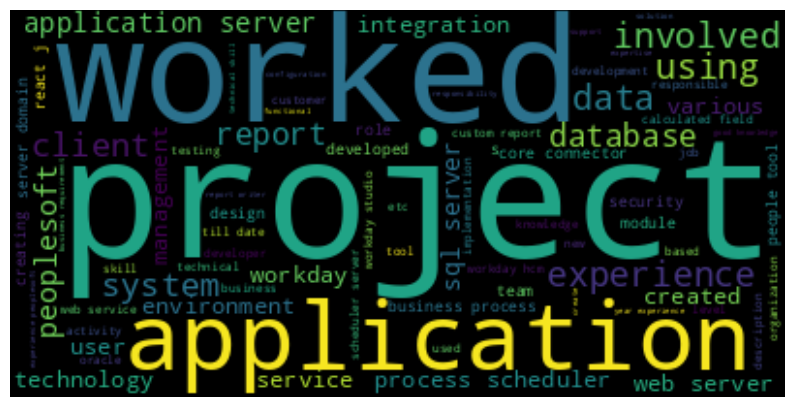

In [ ]:
wc = WordCloud().generate(CleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
categories = np.sort(df['Category'].unique())

In [ ]:
categories

array(['Peoplesoft resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [ ]:
data_categories = [df[df['Category'] == Category].loc[:, ['Absolute_Clean_Resumes', 'Category']] for Category in categories ]


In [ ]:
data_categories

[                               Absolute_Clean_Resumes           Category
 24  hari narayana professional summary year experi...  Peoplesoft resume
 25  peoplesoft database administrator gangareddy p...  Peoplesoft resume
 26  peoplesoft adminpeoplesoft dba ganesh alladi c...  Peoplesoft resume
 27  profile summary year experience implementing u...  Peoplesoft resume
 28  peoplesoft admin varkala vikas career objectiv...  Peoplesoft resume
 29  anubhav kumar singh core competency scripting ...  Peoplesoft resume
 30  c n c address manyata tech park nagavara banga...  Peoplesoft resume
 31  rahul ahuja summary year experience peoplesoft...  Peoplesoft resume
 32  priyabrata hota career objective pursuing peop...  Peoplesoft resume
 33  tanna sujatha objective seeking challenging ro...  Peoplesoft resume
 34  vinod akkala peoplesoft dba admin professional...  Peoplesoft resume
 35  murali professional summary year experience pe...  Peoplesoft resume
 36  peoplesoft administrator srinivas

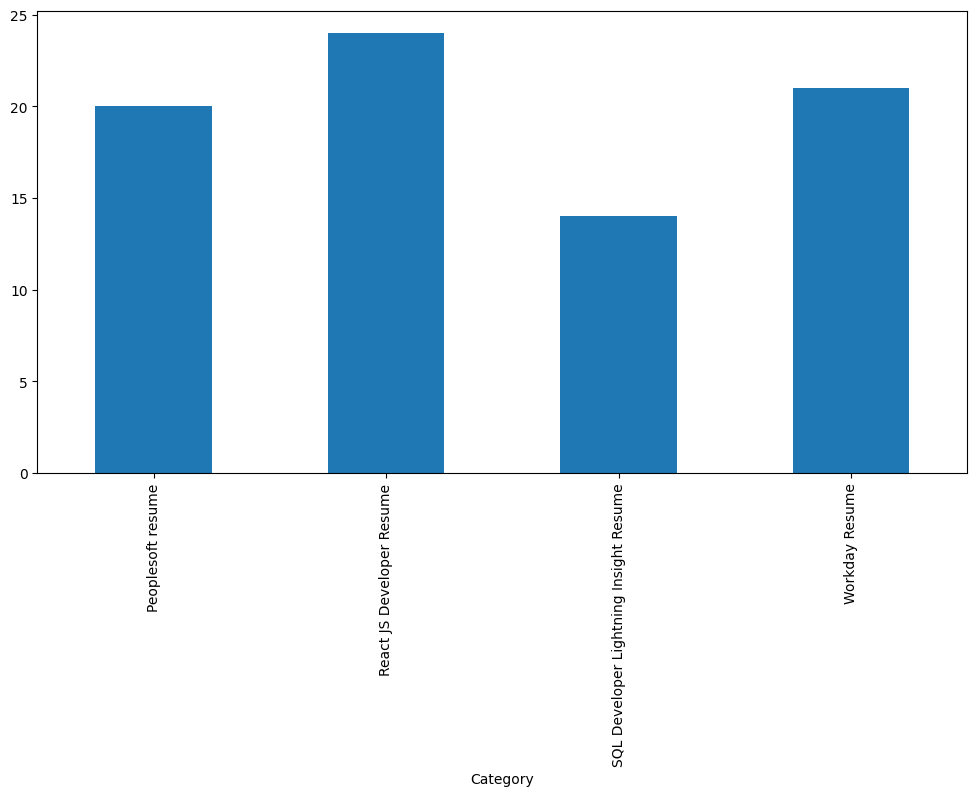

In [ ]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.show()

In [ ]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Absolute_Clean_Resumes'])
    wordcloud = WordCloud(height=2000, width=4000, colormap=WORDCLOUD_COLOR_MAP).generate(txt)

    return wordcloud

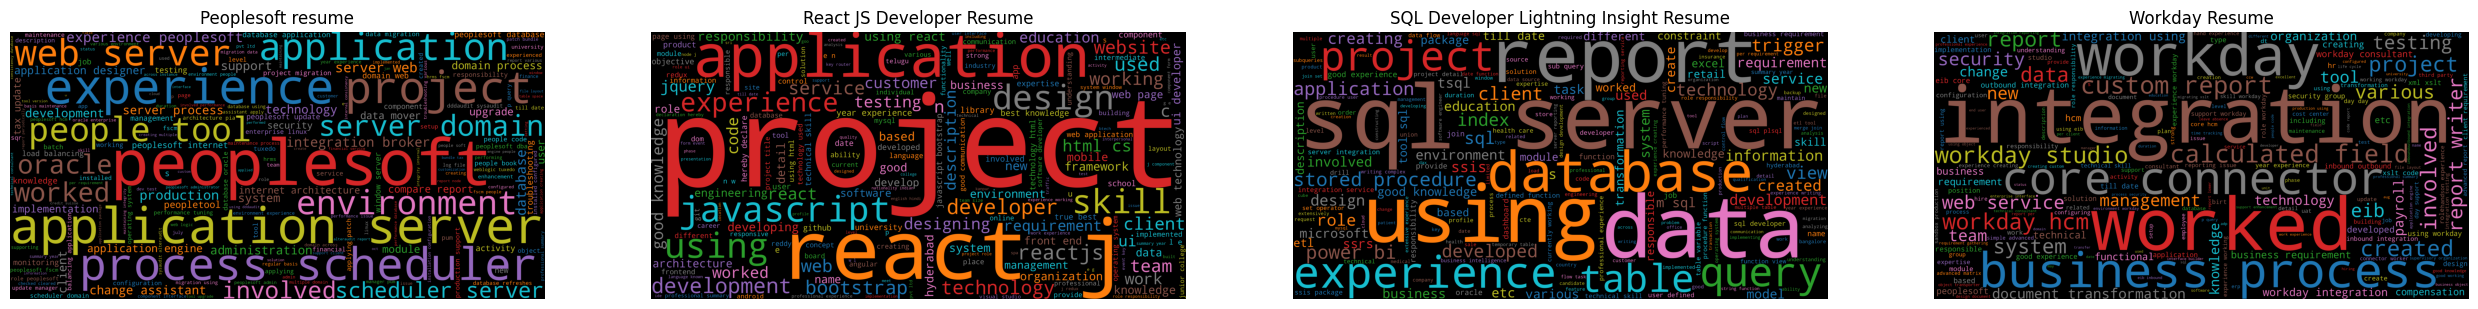

In [ ]:
plot_palette = 'tableau-colorblind10'
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(plot_palette)
%matplotlib inline
plt.figure(figsize=(40, 28))

for i, category in enumerate(categories):
    wc = wordcloud(data_categories[i])

    plt.subplot(5,5, i+1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [ ]:
from sklearn.preprocessing import LabelEncoder
var_mod =['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [ ]:
df

,Category,Absolute_Clean_Resumes
0,1,md khizaruddin rauf experience currently worki...
1,1,susovan bag seeking challenging position field...
2,1,naveen sadhu title software developer location...
3,1,haripriya battina experience ui developer reac...
4,1,sarala madasu sarala madasu geethika prestiger...
...,...,...
74,3,srikanth workday hcm consultant seeking suitab...
75,3,name gopi krishna reddy professional summery w...
76,3,venkateswarlub workday consultant year experie...
77,3,chinna subbarayudu dob march nationality india...


In [ ]:
df['Category'].head()

0    1
1    1
2    1
3    1
4    1
Name: Category, dtype: int64

In [ ]:
df.Category.value_counts()

Category
1    24
3    21
0    20
2    14
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

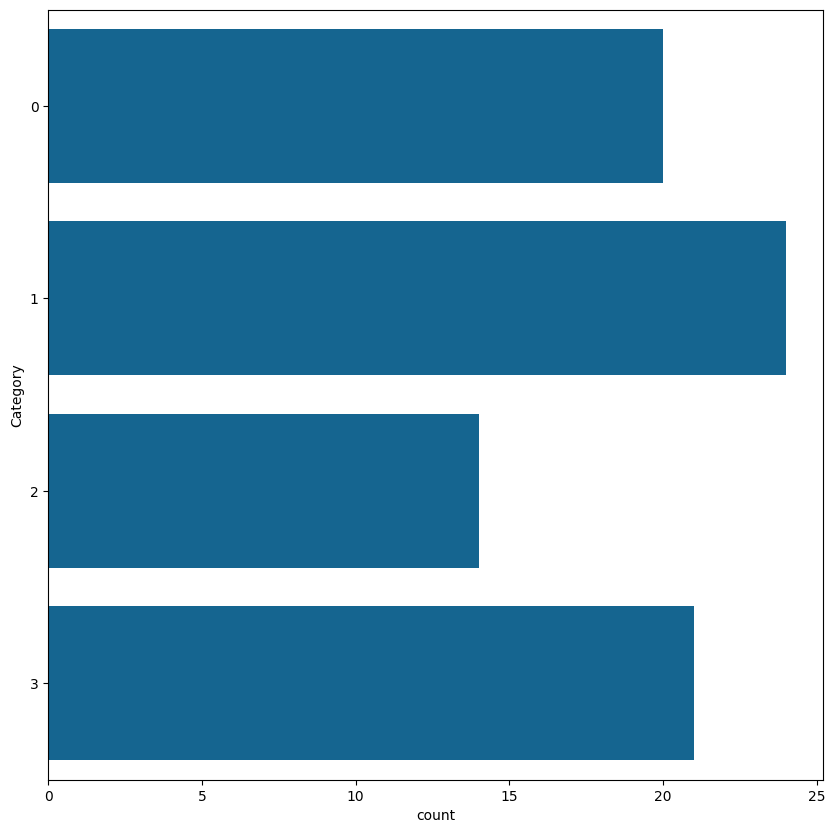

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.countplot(y='Category', data=df)

In [ ]:
#targetCounts = df['Category'].value_counts().reset_index()['Category']
#targetLabels = df['Category'].value_counts().reset_index()['index']

# Get the value counts of the 'Category' column and reset the index
value_counts_df = df['Category'].value_counts().reset_index()

# Rename the columns to make it clear
value_counts_df.columns = ['Category', 'Count']

# Extract the counts and labels
targetCounts = value_counts_df['Count']
targetLabels = value_counts_df['Category']

In [ ]:
targetCounts

0    24
1    21
2    20
3    14
Name: Count, dtype: int64

In [ ]:
targetLabels

0    1
1    3
2    0
3    2
Name: Category, dtype: int64

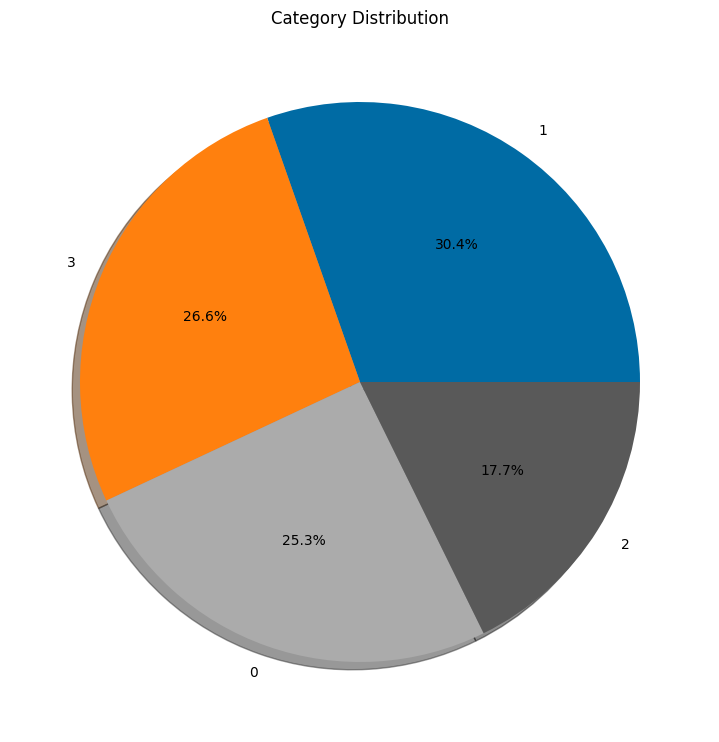

In [ ]:
from matplotlib.gridspec import GridSpec
plt.figure(1,figsize=(20,20))
the_grid = GridSpec(2,2)
plt.subplot(the_grid[0,1], aspect=1, title='Category Distribution')
source_pie = plt.pie(targetCounts, labels = targetLabels, autopct='%1.1f%%', shadow=True)



#TF-IDF

In [ ]:
requiredText = df['Absolute_Clean_Resumes'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [ ]:
requiredTarget

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])


#spliting the data train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=12, test_size=0.20, stratify = requiredTarget)


In [ ]:
X_train.shape, X_test.shape,


((63, 4266), (16, 4266))

In [ ]:
y_train.shape, y_test.shape


((63,), (16,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, confusion_matrix, recall_score, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# pip install lightgbm


#Support Vector Machine Classifier(SVC)

Linear classifier

Linear Function

In [ ]:
clf = SVC(kernel='linear', C = 1.0)
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
Y_pred_train = clf.predict(X_train)
Y_pred_train

array([0, 1, 2, 3, 1, 0, 3, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 3, 3,
       2, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 2, 1, 3, 1, 2, 2, 1, 3, 3, 3])

In [ ]:
Y_pred_test = clf.predict(X_test)
Y_pred_test

array([1, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 0])

In [ ]:
train_Accuracy_1 =accuracy_score(y_train,Y_pred_train)
train_Accuracy_1

1.0

In [ ]:
test_Accuracy_1 =accuracy_score(y_test,Y_pred_test)
test_Accuracy_1

1.0

In [ ]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



Non Linear classifier

Polynomial function

In [ ]:
clf = SVC(kernel='poly', degree=2)
clf.fit(X_train,y_train)

SVC(degree=2, kernel='poly')

In [ ]:
Y_pred_train = clf.predict(X_train)
Y_pred_train

array([0, 1, 2, 3, 1, 0, 3, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 3, 3,
       2, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 2, 1, 3, 1, 2, 2, 1, 3, 3, 3])

In [ ]:
Y_pred_test = clf.predict(X_test)
Y_pred_test

array([1, 1, 2, 3, 0, 1, 3, 3, 1, 1, 0, 3, 1, 2, 1, 0])

In [ ]:
train_Accuracy_1 =accuracy_score(y_train,Y_pred_train)
train_Accuracy_1

1.0

In [ ]:
test_Accuracy_1 =accuracy_score(y_test,Y_pred_test)
test_Accuracy_1

0.875

Radial kasis function

In [ ]:
clf = SVC(kernel='rbf', gamma=1)
clf.fit(X_train,y_train)

SVC(gamma=1)

In [ ]:
Y_pred_train = clf.predict(X_train)
Y_pred_train

array([0, 1, 2, 3, 1, 0, 3, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 3, 3,
       2, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 2, 1, 3, 1, 2, 2, 1, 3, 3, 3])

In [ ]:
Y_pred_test = clf.predict(X_test)
Y_pred_test


array([1, 1, 2, 3, 0, 1, 3, 3, 1, 1, 0, 3, 1, 2, 1, 0])

In [ ]:
train_Accuracy_1 =accuracy_score(y_train,Y_pred_train)
train_Accuracy_1

1.0

In [ ]:
test_Accuracy_1 =accuracy_score(y_test,Y_pred_test)
test_Accuracy_1

0.875

In [ ]:
Train_cm1 = confusion_matrix(y_train, Y_pred_train)
Train_cm1

array([[16,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]])

In [ ]:
test_cm1 = confusion_matrix(y_test, Y_pred_test)
test_cm1

array([[3, 1, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

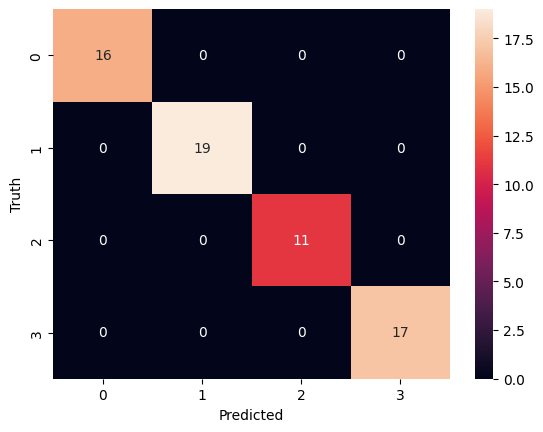

In [ ]:
sns.heatmap(Train_cm1,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

Text(50.722222222222214, 0.5, 'Truth')

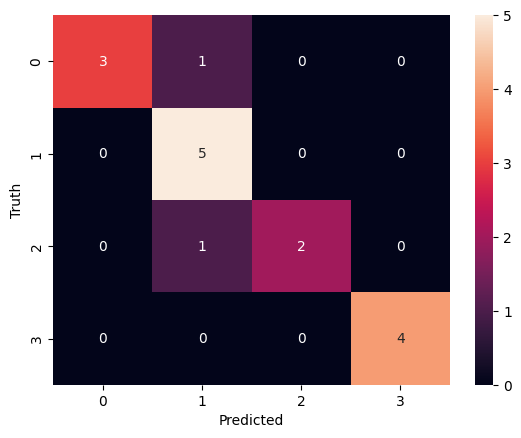

In [ ]:
sns.heatmap(test_cm1,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.71      1.00      0.83         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.93      0.85      0.87        16
weighted avg       0.91      0.88      0.87        16



In [ ]:
accuracy_1 = round(accuracy_score(y_test,Y_pred_test),4)
precision_1 = round(precision_score(y_test,Y_pred_test,average='macro'),4)
recall_1 = round(recall_score(y_test,Y_pred_test,average='macro'),4)
f1_1 = round(f1_score(y_test,Y_pred_test,average='macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)

Accuracy Score  :  0.875
Precision Score :  0.9286
Recall Score    :  0.8542
f1-Score        :  0.8726


#KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, p=2)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
Y_pred_train = knn.predict(X_train)
Y_pred_train

array([0, 1, 2, 3, 1, 0, 3, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 3, 3,
       2, 1, 2, 3, 3, 0, 0, 3, 1, 3, 1, 0, 3, 1, 3, 1, 3, 2, 0, 2, 2, 1,
       1, 0, 3, 1, 3, 3, 3, 3, 0, 2, 1, 3, 1, 2, 2, 1, 3, 3, 3])

In [ ]:
Y_pred_test = knn.predict(X_test)
Y_pred_test

array([1, 1, 2, 3, 0, 1, 3, 3, 1, 0, 3, 3, 1, 2, 2, 0])

In [ ]:
train_Accuracy_2 = accuracy_score(y_train,Y_pred_train).round(3)
train_Accuracy_2

0.937

In [ ]:
test_Accuracy_2 = accuracy_score(y_test,Y_pred_test).round(3)
test_Accuracy_2

0.938

In [ ]:
train_cm2 = confusion_matrix(y_train,Y_pred_train)
train_cm2

array([[13,  0,  0,  3],
       [ 0, 18,  0,  1],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]])

In [ ]:
test_cm2 = confusion_matrix(y_test,Y_pred_test)
test_cm2

array([[3, 0, 0, 1],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

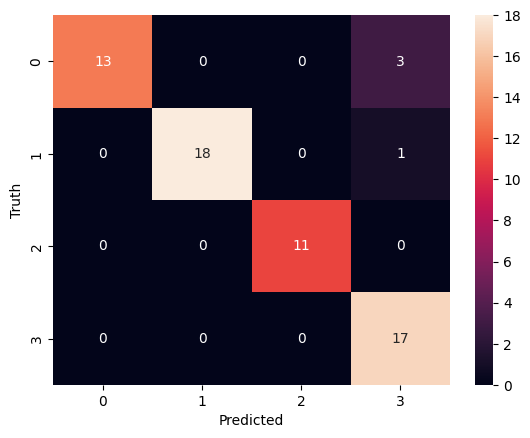

In [ ]:
sns.heatmap(train_cm2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(50.722222222222214, 0.5, 'Truth')

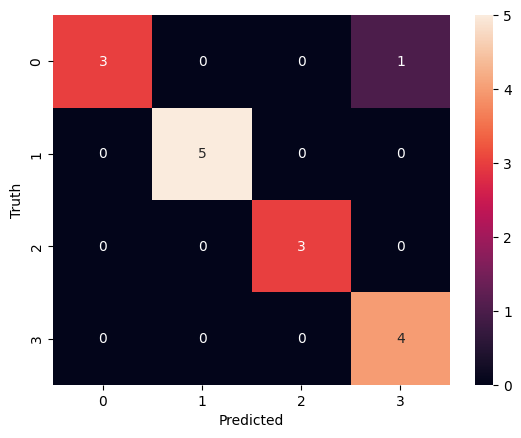

In [ ]:
sns.heatmap(test_cm2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.95      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



In [ ]:
accuracy_2 = round(accuracy_score(y_test,Y_pred_test),4)
precision_2 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_2 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_2 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)

Accuracy Score  :  0.9375
Precision Score :  0.95
Recall Score    :  0.9375
f1-Score        :  0.9365


#Naive-Bayes Classifier

In [ ]:
NB = MultinomialNB()
NB.fit(X_train,y_train)

MultinomialNB()

In [ ]:
Y_pred_train = NB.predict(X_train)
Y_pred_train

array([0, 1, 2, 3, 1, 0, 3, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 3, 3,
       2, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 2, 1, 3, 1, 2, 2, 1, 3, 3, 3])

In [ ]:
Y_pred_test = NB.predict(X_test)
Y_pred_test

array([1, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 3, 0])

In [ ]:
train_Accuracy_3 = accuracy_score(y_train, Y_pred_train)
train_Accuracy_3

1.0

In [ ]:
test_Accuracy_3 = accuracy_score(y_test, Y_pred_test)
test_Accuracy_3

0.9375

In [ ]:
train_cm3 = confusion_matrix(y_train, Y_pred_train)
train_cm3

array([[16,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]])

In [ ]:
test_cm3 = confusion_matrix(y_test, Y_pred_test)
test_cm3

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 2, 1],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

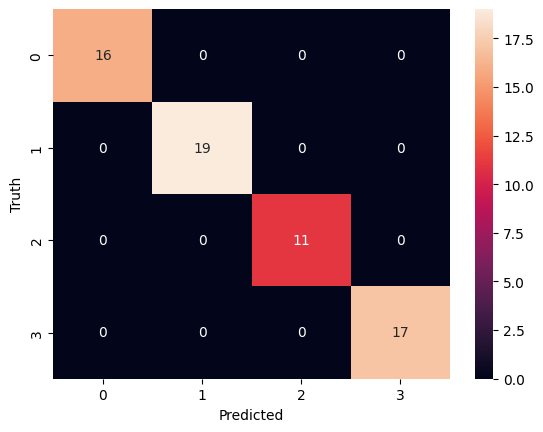

In [ ]:
sns.heatmap(train_cm3,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(50.722222222222214, 0.5, 'Truth')

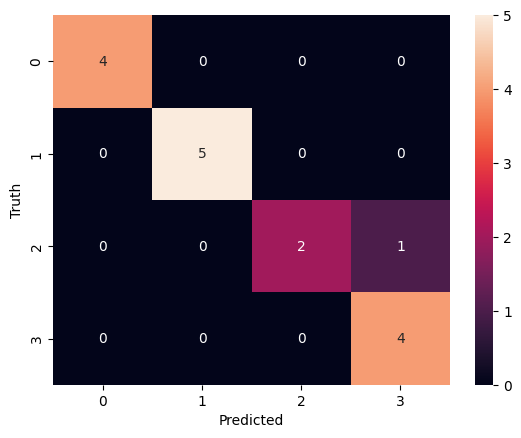

In [ ]:
sns.heatmap(test_cm3,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      0.67      0.80         3
           3       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.95      0.92      0.92        16
weighted avg       0.95      0.94      0.93        16



In [ ]:
from sklearn.metrics import log_loss


In [ ]:
pred = NB.predict_proba(X_test)


In [ ]:
log_loss(y_test, pred)


0.6639739600289325

In [ ]:
accuracy_3 = round(accuracy_score(y_test,Y_pred_test),4)
precision_3 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_3 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_3 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Accuracy Score  :  0.9375
Precision Score :  0.95
Recall Score    :  0.9167
f1-Score        :  0.9222


#Decision Tree Classifier

In [ ]:
DTC = DecisionTreeClassifier(max_depth=2)
DTC.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2)

In [ ]:
Y_pred_train = DTC.predict(X_train)
Y_pred_train

array([0, 1, 1, 3, 1, 0, 3, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 3, 3,
       1, 1, 1, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 1, 0, 1, 1, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3])

In [ ]:
Y_pred_test = DTC.predict(X_test)
Y_pred_test

array([1, 1, 1, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 1, 1, 0])

In [ ]:
DTC.tree_.max_depth


2

In [ ]:
DTC.tree_.node_count


5

In [ ]:
train_Accuracy_4 = accuracy_score(y_train, Y_pred_train)
train_Accuracy_4

0.8253968253968254

In [ ]:
test_Accuracy_4 = accuracy_score(y_test, Y_pred_test)
test_Accuracy_4

0.8125

In [ ]:
train_cm4 = confusion_matrix(y_train, Y_pred_train)
train_cm4

array([[16,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0, 11,  0,  0],
       [ 0,  0,  0, 17]])

In [ ]:
test_cm4 = confusion_matrix(y_test, Y_pred_test)
test_cm4

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

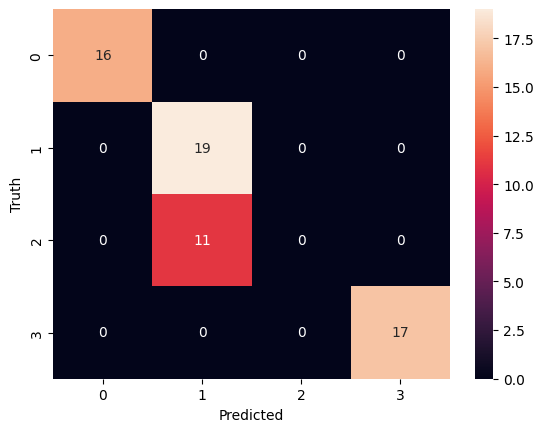

In [ ]:
sns.heatmap(train_cm4,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(50.722222222222214, 0.5, 'Truth')

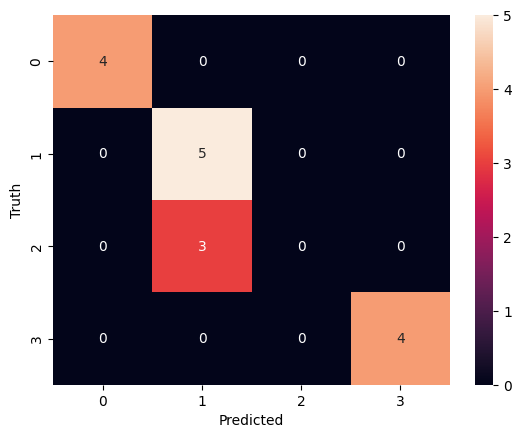

In [ ]:
sns.heatmap(test_cm4,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.62      1.00      0.77         5
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.81        16
   macro avg       0.66      0.75      0.69        16
weighted avg       0.70      0.81      0.74        16



In [ ]:
accuracy_4 = round(accuracy_score(y_test,Y_pred_test),4)
precision_4 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_4 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_4 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)

Accuracy Score  :  0.8125
Precision Score :  0.6562
Recall Score    :  0.75
f1-Score        :  0.6923



#Random Forest Classifer

In [ ]:
RFC = RandomForestClassifier(n_estimators=250,max_features=0.8,max_depth=2)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, max_features=0.8, n_estimators=250)

In [ ]:
Y_pred_train = RFC.predict(X_train)
Y_pred_train

array([0, 1, 2, 3, 1, 0, 3, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 3, 3,
       2, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 2, 1, 3, 1, 2, 2, 1, 3, 3, 3])

In [ ]:
Y_pred_test = RFC.predict(X_test)
Y_pred_test

array([1, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 0])

In [ ]:
train_Accuracy_5 = accuracy_score(y_train,Y_pred_train)
train_Accuracy_5

1.0

In [ ]:
test_Accuracy_5 = accuracy_score(y_test,Y_pred_test)
test_Accuracy_5

1.0

In [ ]:
train_cm5 = confusion_matrix(y_train, Y_pred_train)
train_cm5

array([[16,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]])

In [ ]:
test_cm5 = confusion_matrix(y_test, Y_pred_test)
test_cm5

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

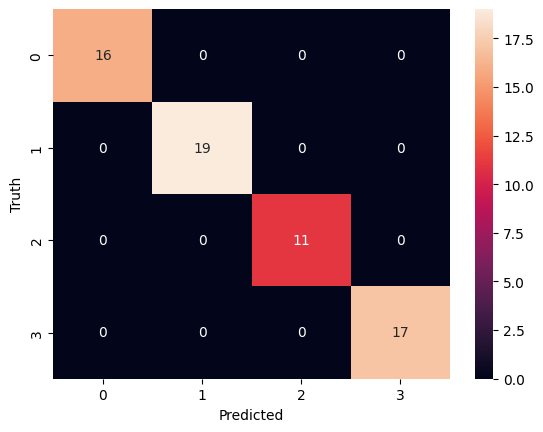

In [ ]:
sns.heatmap(train_cm5,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(50.722222222222214, 0.5, 'Truth')

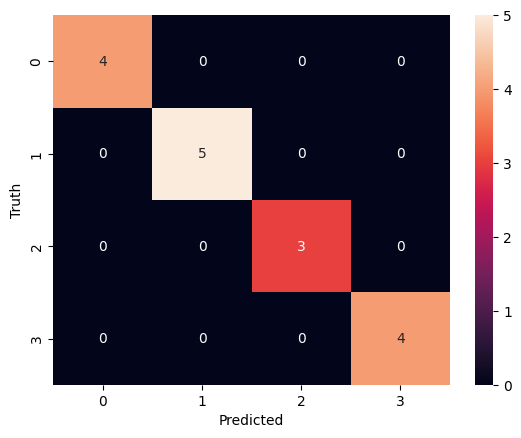

In [ ]:
sns.heatmap(test_cm5,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [ ]:
accuracy_5 = round(accuracy_score(y_test,Y_pred_test),4)
precision_5 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_5 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_5 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0



#AdaBoost Classifier

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=100,random_state=0,learning_rate=0.0001)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.0001, n_estimators=100, random_state=0)

In [ ]:
Y_pred_train = adaboost.predict(X_train)
Y_pred_train

array([0, 1, 1, 3, 1, 0, 3, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 3, 3,
       1, 1, 1, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 1, 0, 1, 1, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3])

In [ ]:
Y_pred_test = adaboost.predict(X_test)
Y_pred_test

array([1, 1, 1, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 1, 1, 0])

In [ ]:
train_Accuracy_6 = accuracy_score(y_train,Y_pred_train)
train_Accuracy_6

0.8253968253968254

In [ ]:
test_Accuracy_6 = accuracy_score(y_test,Y_pred_test)
test_Accuracy_6

0.8125

In [ ]:
train_cm6 = confusion_matrix(y_train,Y_pred_train)
train_cm6

array([[16,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0, 11,  0,  0],
       [ 0,  0,  0, 17]])

In [ ]:
test_cm6 = confusion_matrix(y_test,Y_pred_test)
test_cm6

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

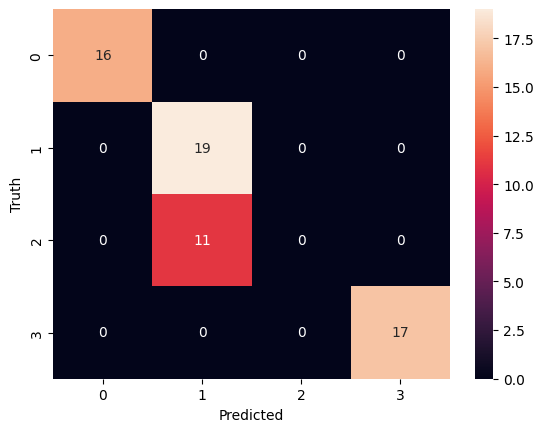

In [ ]:
sns.heatmap(train_cm6,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(50.722222222222214, 0.5, 'Truth')

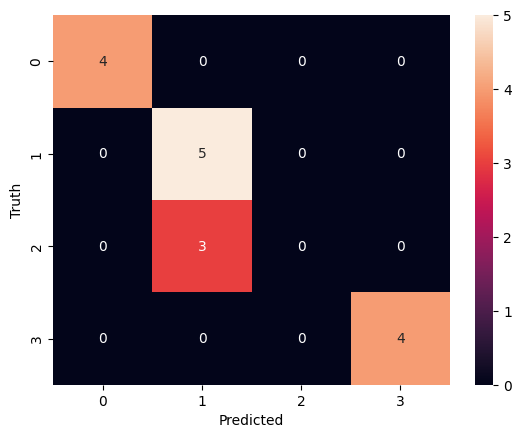

In [ ]:
sns.heatmap(test_cm6,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.62      1.00      0.77         5
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.81        16
   macro avg       0.66      0.75      0.69        16
weighted avg       0.70      0.81      0.74        16



In [ ]:
accuracy_6 = round(accuracy_score(y_test,Y_pred_test),4)
precision_6 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_6 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_6 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)

Accuracy Score  :  0.8125
Precision Score :  0.6562
Recall Score    :  0.75
f1-Score        :  0.6923



#GradientBoosting Classifier

In [ ]:
Gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.001,max_depth=2, random_state=0)
Gboost.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.001, max_depth=2, random_state=0)

In [ ]:
Y_pred_train = Gboost.predict(X_train)
Y_pred_train

array([0, 1, 1, 3, 1, 0, 3, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 3, 3,
       1, 1, 1, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 1, 0, 1, 1, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3])

In [ ]:
Y_pred_test = Gboost.predict(X_test)
Y_pred_test

array([1, 1, 1, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 1, 1, 0])

In [ ]:
train_Accuracy_7 = accuracy_score(y_train,Y_pred_train)
train_Accuracy_7

0.8253968253968254

In [ ]:
test_Accuracy_7 = accuracy_score(y_test,Y_pred_test)
test_Accuracy_7

0.8125

In [ ]:
train_cm7 = confusion_matrix(y_train,Y_pred_train)
train_cm7

array([[16,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0, 11,  0,  0],
       [ 0,  0,  0, 17]])

In [ ]:
test_cm7 = confusion_matrix(y_test,Y_pred_test)
test_cm7

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

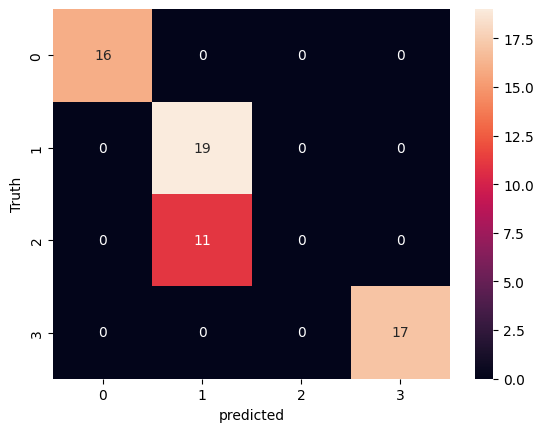

In [ ]:
sns.heatmap(train_cm7,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

Text(50.722222222222214, 0.5, 'Truth')

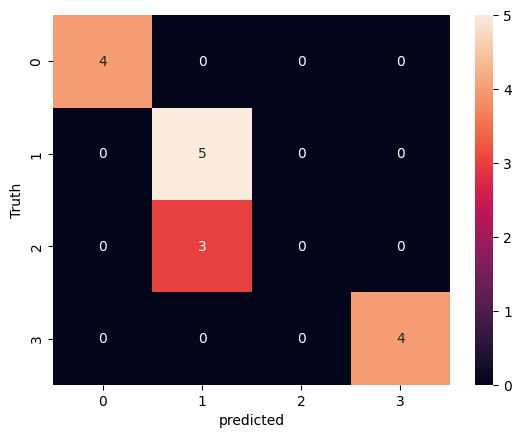

In [ ]:
sns.heatmap(test_cm7,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.62      1.00      0.77         5
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.81        16
   macro avg       0.66      0.75      0.69        16
weighted avg       0.70      0.81      0.74        16



In [ ]:
accuracy_7 = round(accuracy_score(y_test,Y_pred_test),4)
precision_7 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_7 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_7 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)

Accuracy Score  :  0.8125
Precision Score :  0.6562
Recall Score    :  0.75
f1-Score        :  0.6923



#XGBoost Classifier

In [ ]:
XGboost = XGBClassifier(n_estimators=200, learning_rate=0.09,max_depth=3, random_state=0)
XGboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
Y_pred_train = XGboost.predict(X_train)
Y_pred_train

array([0, 1, 2, 3, 1, 0, 3, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 3, 3,
       2, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 2, 1, 3, 1, 2, 2, 1, 3, 3, 3])

In [ ]:
Y_pred_test = XGboost.predict(X_test)
Y_pred_test

array([0, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 0])

In [ ]:
train_Accuracy_8 = accuracy_score(y_train,Y_pred_train)
train_Accuracy_8

1.0

In [ ]:
test_Accuracy_8 = accuracy_score(y_test,Y_pred_test)
test_Accuracy_8

0.9375

In [ ]:
train_cm8 = confusion_matrix(y_train,Y_pred_train)
train_cm8

array([[16,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]])

In [ ]:
test_cm8 = confusion_matrix(y_test,Y_pred_test)
test_cm8

array([[4, 0, 0, 0],
       [1, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'truth')

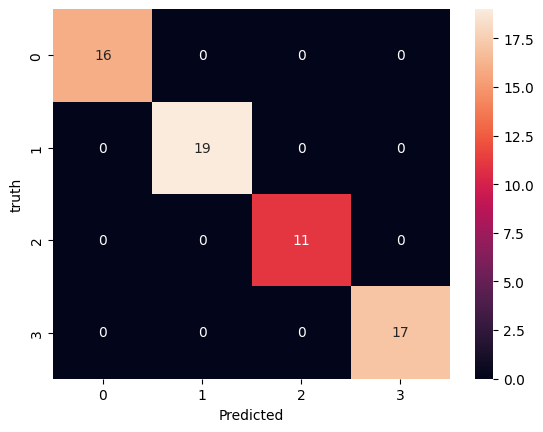

In [ ]:
sns.heatmap(train_cm8,annot=True)
plt.xlabel("Predicted")
plt.ylabel('truth')

Text(50.722222222222214, 0.5, 'truth')

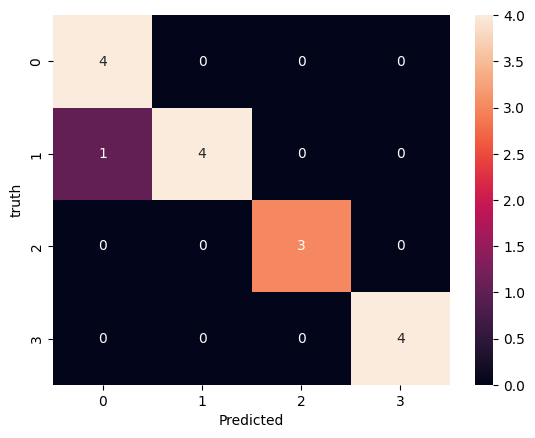

In [ ]:
sns.heatmap(test_cm8,annot=True)
plt.xlabel("Predicted")
plt.ylabel('truth')

In [ ]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.95      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16



In [ ]:
accuracy_8 = round(accuracy_score(y_test,Y_pred_test),4)
precision_8 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_8 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_8 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)

Accuracy Score  :  0.9375
Precision Score :  0.95
Recall Score    :  0.95
f1-Score        :  0.9444


#LGBM-Boosting Classifier

In [ ]:
LGboost = LGBMClassifier()
LGboost.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1757
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 145
[LightGBM] [Info] Start training from score -1.370546
[LightGBM] [Info] Start training from score -1.198696
[LightGBM] [Info] Start training from score -1.745239
[LightGBM] [Info] Start training from score -1.309921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

LGBMClassifier()

In [ ]:
Y_pred_train = LGboost.predict(X_train)
Y_pred_train

array([0, 1, 2, 3, 1, 0, 3, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 3, 3,
       2, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1,
       1, 0, 3, 1, 3, 1, 3, 3, 0, 2, 1, 3, 1, 2, 2, 1, 3, 3, 3])

In [ ]:
Y_pred_test = LGboost.predict(X_test)
Y_pred_test

array([1, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 3, 1, 2, 2, 0])

In [ ]:
train_Accuracy_9 = accuracy_score(y_train, Y_pred_train)
train_Accuracy_9

1.0

In [ ]:
test_Accuracy_9 = accuracy_score(y_test, Y_pred_test)
test_Accuracy_9

1.0

In [ ]:
train_cm9 = confusion_matrix(y_train,Y_pred_train)
train_cm9

array([[16,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]])

In [ ]:
test_cm9 = confusion_matrix(y_test,Y_pred_test)
test_cm9

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

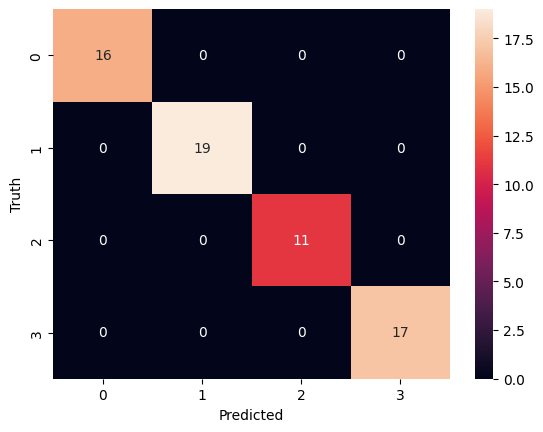

In [ ]:
sns.heatmap(train_cm9,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(50.722222222222214, 0.5, 'Truth')

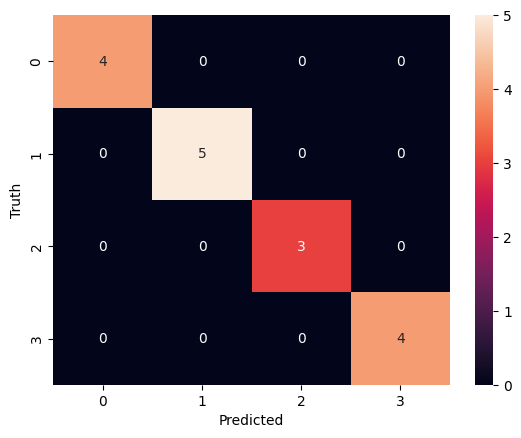

In [ ]:
sns.heatmap(test_cm9,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,Y_pred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [ ]:
accuracy_9 = round(accuracy_score(y_test,Y_pred_test),4)
precision_9 = round(precision_score(y_test,Y_pred_test,average = 'macro'),4)
recall_9 = round(recall_score(y_test,Y_pred_test, average = 'macro'),4)
f1_9 = round(f1_score(y_test,Y_pred_test, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_9)
print('Precision Score : ', precision_9)
print('Recall Score    : ', recall_9)
print('f1-Score        : ', f1_9)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


In [ ]:
table = {'Classifier' : ['SVM Classifier','K-Nearest Neighbourhood Classifier','Naive-Bayes Classifier','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier'],
         'Training_Accuracy' : [train_Accuracy_1, train_Accuracy_2, train_Accuracy_3, train_Accuracy_4, train_Accuracy_5, train_Accuracy_6, train_Accuracy_7, train_Accuracy_8, train_Accuracy_9],
         'Testing_Accuracy' : [test_Accuracy_1, test_Accuracy_2, test_Accuracy_3,test_Accuracy_4,test_Accuracy_5,test_Accuracy_6, test_Accuracy_7, test_Accuracy_8, test_Accuracy_9],
         'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8, precision_9],
         'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8, recall_9],
         'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8, f1_9]}
table = pd.DataFrame(table)
table

,Classifier,Training_Accuracy,Testing_Accuracy,Precision Score,Recall Score,F1_Score
0,SVM Classifier,1.000000,0.8750,0.9286,0.8542,0.8726
1,K-Nearest Neighbourhood Classifier,0.937000,0.9380,0.9500,0.9375,0.9365
2,Naive-Bayes Classifier,1.000000,0.9375,0.9500,0.9167,0.9222
3,Decision Tree Classifier,0.825397,0.8125,0.6562,0.7500,0.6923
4,Random Forest Classifier,1.000000,1.0000,1.0000,1.0000,1.0000
5,AdaBoost Classifier,0.825397,0.8125,0.6562,0.7500,0.6923
6,Gradient Boosting Classifier,0.825397,0.8125,0.6562,0.7500,0.6923
7,Xtreme Gradient Boosting Classifier,1.000000,0.9375,0.9500,0.9500,0.9444
8,Light Gradient Boosting Classifier,1.000000,1.0000,1.0000,1.0000,1.0000



#convolutional neural networks Model(CNN)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
# Define the model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(WordFeatures.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
X_train_2D = X_train.toarray().reshape(X_train.shape[0], X_train.shape[1], 1)
cnn_model.fit(X_train_2D, y_train, epochs=100, batch_size=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.6931 - accuracy: 0.2222
Epoch 2/100
1/1 [==============================] - 0s 224ms/step - loss: 0.3122 - accuracy: 0.3016
Epoch 3/100
1/1 [==============================] - 0s 276ms/step - loss: -0.2509 - accuracy: 0.3016
Epoch 4/100
1/1 [==============================] - 0s 262ms/step - loss: -0.9909 - accuracy: 0.3016
Epoch 5/100
1/1 [==============================] - 0s 245ms/step - loss: -1.8483 - accuracy: 0.3016
Epoch 6/100
1/1 [==============================] - 0s 267ms/step - loss: -2.8811 - accuracy: 0.3016
Epoch 7/100
1/1 [==============================] - 0s 232ms/step - loss: -4.1547 - accuracy: 0.3016
Epoch 8/100
1/1 [==============================] - 0s 203ms/step - loss: -5.7023 - accuracy: 0.3016
Epoch 9/100
1/1 [==============================] - 0s 229ms/step - loss: -7.5424 - accuracy: 0.3016
Epoch 10/100
1/1 [==============================] - 0s 216ms/step - loss: -9.6941 - accuracy: 0.3016
Epoc

In [ ]:
# Generate predictions on test data
X_test_2D = X_test.toarray().reshape(X_test.shape[0], X_test.shape[1], 1)
cnn_pred = cnn_model.predict(X_test_2D)

# Print example predictions
for i in range(10):
    print('True label: {}, Predicted label: {}'.format(y_test[i], cnn_pred[i]))

1/1 [==============================] - 0s 121ms/step
True label: 1, Predicted label: [1.]
True label: 1, Predicted label: [1.]
True label: 2, Predicted label: [1.]
True label: 3, Predicted label: [1.]
True label: 0, Predicted label: [1.]
True label: 1, Predicted label: [1.]
True label: 3, Predicted label: [1.]
True label: 3, Predicted label: [1.]
True label: 1, Predicted label: [1.]
True label: 0, Predicted label: [1.]


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# Calculate performance metrics
accuracy_cnn = accuracy_score(y_test, cnn_pred)
precision_cnn = precision_score(y_test, cnn_pred, average='weighted')
recall_cnn = recall_score(y_test, cnn_pred, average='weighted')
f1_cnn = f1_score(y_test, cnn_pred, average='weighted')

# Print the performance metrics
print("Accuracy:", accuracy_cnn)
print("Precision:", precision_cnn)
print("Recall:", recall_cnn)
print("F1 score:", f1_cnn)

Accuracy: 0.3125
Precision: 0.09765625
Recall: 0.3125
F1 score: 0.1488095238095238
